### Airline Data: Travel sqlite

### Business Problem:

Our Company has been providing high-quality air transportation service to our clients for several years, ensuring a safe, comfortable, and convenient journey for our passengers.

We operate a diverse fleet of aircraft, ranging from small business jets to medium-sized machines. However, we currently face challenges due to various factors such as stricter environmental regulations, higher flight taxes, increased interest rates, rising fuel prices, and a tight labor market leading to higher labor costs. These challenges are putting pressure on the company's profitability, and we are actively seeking solutions to address this issue. In order to tackle this challenge, the company is planning to analyze their database and identify opportunities to increase the occupancy rate, thereby boosting the 
average profit earned per seat

In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

import scipy.stats as stats

#### Database Connection (Connecting Python with SQL database using sqlite and cursor)

In [223]:
import sqlite3

In [224]:
connection = sqlite3.connect(r'C:\Users\mohit\Downloads\travels.sqlite')

In [225]:
cursor = connection.cursor()

In [226]:
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
tables = [table[0] for table in cursor.fetchall()]
print(tables)

['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets']


### Analysing Aircrafts Data

In [260]:
aircraft_data = pd.read_sql_query('select * from aircrafts_data', connection)

In [261]:
aircraft_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


#### Checking Shape of the dataset

In [262]:
rows = ['Number of rows', 'Number of columns']
pd.DataFrame(aircraft_data.shape, columns = ['shape of data'], index = rows)

,shape of data
Number of rows,9
Number of columns,3


#### Checking datatypes of Attributes in a dataset

In [263]:
aircraft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aircraft_code  9 non-null      object
 1   model          9 non-null      object
 2   range          9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 344.0+ bytes


#### Checking Descriptive Statistics of the dataset

In [264]:
aircraft_data.describe()

,range
count,9.000000
mean,5344.444444
std,3013.764718
min,1200.000000
25%,3000.000000
50%,5600.000000
75%,6700.000000
max,11100.000000


#### Now we are splitting the column 'model' by using split() function, after applying split() function the output we get is in Series

In [265]:
aircraft_data['model'].str.split()

0    [{"en":, "Boeing, 777-300",, "ru":, "Боинг, 77...
1    [{"en":, "Boeing, 767-300",, "ru":, "Боинг, 76...
2    [{"en":, "Sukhoi, Superjet-100",, "ru":, "Сухо...
3    [{"en":, "Airbus, A320-200",, "ru":, "Аэробус,...
4    [{"en":, "Airbus, A321-200",, "ru":, "Аэробус,...
5    [{"en":, "Airbus, A319-100",, "ru":, "Аэробус,...
6    [{"en":, "Boeing, 737-300",, "ru":, "Боинг, 73...
7    [{"en":, "Cessna, 208, Caravan",, "ru":, "Сесс...
8    [{"en":, "Bombardier, CRJ-200",, "ru":, "Бомба...
Name: model, dtype: object

#### We have applied split() and join() function 

In [266]:
aircraft_data['model'] = aircraft_data['model'].str.split().str[1:3].apply(''.join)
aircraft_data['model']

0         "Boeing777-300",
1         "Boeing767-300",
2    "SukhoiSuperjet-100",
3        "AirbusA320-200",
4        "AirbusA321-200",
5        "AirbusA319-100",
6         "Boeing737-300",
7               "Cessna208
8     "BombardierCRJ-200",
Name: model, dtype: object

#### Stripping/Removing Punctuation marks by using strip() function

In [267]:
aircraft_data['model'] = aircraft_data['model'].str.strip(', "')

In [268]:
aircraft_data['model']

0         Boeing777-300
1         Boeing767-300
2    SukhoiSuperjet-100
3        AirbusA320-200
4        AirbusA321-200
5        AirbusA319-100
6         Boeing737-300
7             Cessna208
8     BombardierCRJ-200
Name: model, dtype: object

#### Again checking the dataset

In [269]:
aircraft_data

,aircraft_code,model,range
0,773,Boeing777-300,11100
1,763,Boeing767-300,7900
2,SU9,SukhoiSuperjet-100,3000
3,320,AirbusA320-200,5700
4,321,AirbusA321-200,5600
5,319,AirbusA319-100,6700
6,733,Boeing737-300,4200
7,CN1,Cessna208,1200
8,CR2,BombardierCRJ-200,2700


- Now our dataset is clean, their are no punctuation marks

#### Checking for Missing values in a dataset

In [270]:
pd.DataFrame(aircraft_data.isnull().sum(), columns = ['Null values'])

,Null values
aircraft_code,0
model,0
range,0


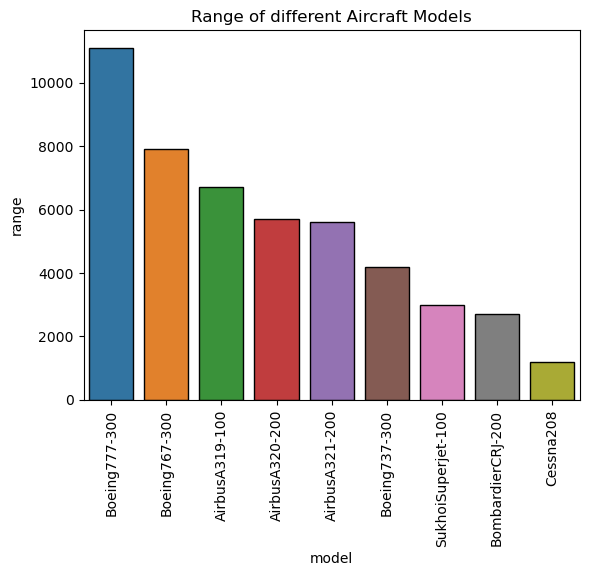

In [271]:
sns.barplot(data=aircraft_data, x = aircraft_data['model'], y = aircraft_data['range'], ci=False,
           order = aircraft_data.groupby(['model'])['range'].mean().sort_values(ascending=False).index,
           edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.title('Range of different Aircraft Models');

-    From above graph we can say that On an Average Boeing 777-300 have Higher range and Cessna-208 have Lower range

### Analysing Airports Data

In [281]:
airports_data = pd.read_sql_query('select * from airports_data', connection)

#### Checking first and last five rows of the dataset

In [282]:
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


#### Checking shape of the dataset

In [283]:
rows = ['Number of rows', 'Number of columns']
pd.DataFrame(airports_data.shape, columns = ['shape of dataset'], index = rows)

,shape of dataset
Number of rows,104
Number of columns,5


#### Checking Datatypes of Attributes in a dataset

In [304]:
airports_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   airport_code  104 non-null    object
 1   airport_name  104 non-null    object
 2   city          104 non-null    object
 3   coordinates   104 non-null    object
 4   timezone      104 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


#### Now we will going to apply split() and Join() function on columns 'airport_name' and 'city'

In [291]:
print('Splitting column airport_name:\n\n', airports_data['airport_name'].str.split(),'\n')
print('Splitting column city:\n\n', airports_data['city'].str.split())

Splitting column airport_name:

 0        [{"en":, "Yakutsk, Airport",, "ru":, "Якутск"}]
1          [{"en":, "Mirny, Airport",, "ru":, "Мирный"}]
2      [{"en":, "Khabarovsk-Novy, Airport",, "ru":, "...
3      [{"en":, "Yelizovo, Airport",, "ru":, "Елизово"}]
4      [{"en":, "Yuzhno-Sakhalinsk, Airport",, "ru":,...
                             ...                        
99     [{"en":, "Murmansk, Airport",, "ru":, "Мурманс...
100       [{"en":, "Abakan, Airport",, "ru":, "Абакан"}]
101     [{"en":, "Barnaul, Airport",, "ru":, "Барнаул"}]
102    [{"en":, "Anapa, Vityazevo, Airport",, "ru":, ...
103     [{"en":, "Chulman, Airport",, "ru":, "Чульман"}]
Name: airport_name, Length: 104, dtype: object 

Splitting column city:

 0                 [{"en":, "Yakutsk",, "ru":, "Якутск"}]
1                  [{"en":, "Mirnyj",, "ru":, "Мирный"}]
2           [{"en":, "Khabarovsk",, "ru":, "Хабаровск"}]
3      [{"en":, "Petropavlovsk",, "ru":, "Петропавлов...
4      [{"en":, "Yuzhno-Sakhalinsk",, 

In [292]:
airports_data['airport_name'] = airports_data['airport_name'].str.split().str[1]
airports_data['city'] = airports_data['city'].str.split().str[1]

In [295]:
airports_data['airport_name']

0                "Yakutsk
1                  "Mirny
2        "Khabarovsk-Novy
3               "Yelizovo
4      "Yuzhno-Sakhalinsk
              ...        
99              "Murmansk
100               "Abakan
101              "Barnaul
102                "Anapa
103              "Chulman
Name: airport_name, Length: 104, dtype: object

In [296]:
airports_data['city']

0                "Yakutsk",
1                 "Mirnyj",
2             "Khabarovsk",
3          "Petropavlovsk",
4      "Yuzhno-Sakhalinsk",
               ...         
99              "Murmansk",
100               "Abakan",
101              "Barnaul",
102                "Anapa",
103            "Neryungri",
Name: city, Length: 104, dtype: object

#### Stripping/Removing punctuation marks

In [301]:
airports_data['airport_name'] = airports_data['airport_name'].str.strip('"')
airports_data['city'] = airports_data['airport_name'].str.strip('" ,')
airports_data['coordinates'] = airports_data['coordinates'].str.strip('()')

In [302]:
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,Yakutsk,Yakutsk,"129.77099609375,62.0932998657226562",Asia/Yakutsk
1,MJZ,Mirny,Mirny,"114.03900146484375,62.534698486328125",Asia/Yakutsk
2,KHV,Khabarovsk-Novy,Khabarovsk-Novy,"135.18800354004,48.5279998779300001",Asia/Vladivostok
3,PKC,Yelizovo,Yelizovo,"158.453994750976562,53.1679000854492188",Asia/Kamchatka
4,UUS,Yuzhno-Sakhalinsk,Yuzhno-Sakhalinsk,"142.718002319335938,46.8886985778808594",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,Murmansk,Murmansk,"32.7508010864257812,68.7817001342773438",Europe/Moscow
100,ABA,Abakan,Abakan,"91.3850021362304688,53.7400016784667969",Asia/Krasnoyarsk
101,BAX,Barnaul,Barnaul,"83.5384979248046875,53.363800048828125",Asia/Krasnoyarsk
102,AAQ,Anapa,Anapa,"37.3473014831539984,45.002101898192997",Europe/Moscow


#### Checking Descriptive Statistics of the dataset

In [303]:
airports_data.describe()

,airport_code,airport_name,city,coordinates,timezone
count,104,104,104,104,104
unique,104,103,103,104,17
top,YKS,Ulyanovsk,Ulyanovsk,"129.77099609375,62.0932998657226562",Europe/Moscow
freq,1,2,2,1,44


#### Checking for Missing values in a dataset

In [306]:
pd.DataFrame(airports_data.isnull().sum(), columns = ['null values'])

,null values
airport_code,0
airport_name,0
city,0
coordinates,0
timezone,0


### Analysing Flights Data

In [332]:
flights = pd.read_sql_query('select * from flights', connection)

#### Checking first and last five rows of the dataset

In [333]:
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


#### Checking shape of the dataset

In [334]:
rows = ['Number of rows', 'Number of columns']
pd.DataFrame(flights.shape, columns = ['shape of the dataset'], index = rows)

,shape of the dataset
Number of rows,33121
Number of columns,10


#### Checking Datatypes of Attributes in a dataset

In [335]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   flight_id            33121 non-null  int64 
 1   flight_no            33121 non-null  object
 2   scheduled_departure  33121 non-null  object
 3   scheduled_arrival    33121 non-null  object
 4   departure_airport    33121 non-null  object
 5   arrival_airport      33121 non-null  object
 6   status               33121 non-null  object
 7   aircraft_code        33121 non-null  object
 8   actual_departure     33121 non-null  object
 9   actual_arrival       33121 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.5+ MB


In [342]:
flights['scheduled_departure'] = pd.to_datetime(flights['scheduled_departure'], dayfirst=True)
flights['scheduled_arrival'] = pd.to_datetime(flights['scheduled_arrival'], dayfirst=True)

In [344]:
flights.dtypes

flight_id                                              int64
flight_no                                             object
scheduled_departure    datetime64[ns, pytz.FixedOffset(180)]
scheduled_arrival      datetime64[ns, pytz.FixedOffset(180)]
departure_airport                                     object
arrival_airport                                       object
status                                                object
aircraft_code                                         object
actual_departure                                      object
actual_arrival                                        object
dtype: object

#### Checking Descriptive statistics of the dataset

In [359]:
flights.select_dtypes('object').describe()

,flight_no,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
count,33121,33121,33121,33121,33121,33121,33121
unique,710,104,104,6,8,12108,11851
top,PG0134,DME,DME,Arrived,CN1,\N,\N
freq,61,3217,3217,16707,9273,16348,16406


#### Checking for Missing values in a dataset

In [360]:
pd.DataFrame(flights.isnull().sum(), columns = ['Null values'])

,Null values
flight_id,0
flight_no,0
scheduled_departure,0
scheduled_arrival,0
departure_airport,0
arrival_airport,0
status,0
aircraft_code,0
actual_departure,0
actual_arrival,0


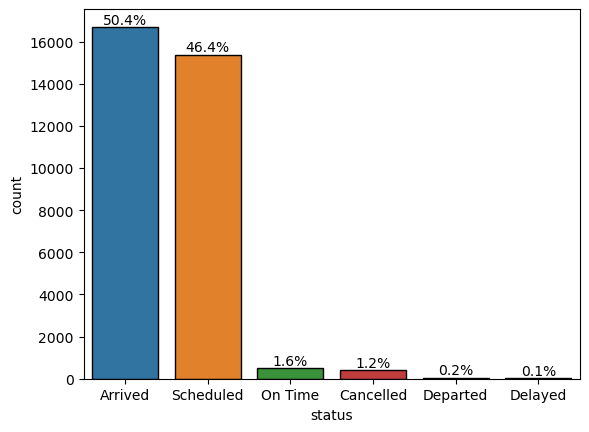

In [365]:
ax = sns.countplot(data=flights, x = 'status', order = flights['status'].value_counts().index, edgecolor='black', linewidth=1)
total = flights['status'].count()
for c in ax.containers:
    ax.bar_label(c, fmt = lambda x: f'{(x/total)*100:0.1f}%')

#### Number of departure across different airports

In [602]:
flights.groupby(['departure_airport'])['flight_no'].count().sort_values(ascending=False).head(10)

departure_airport
DME    3217
SVO    2981
LED    1900
VKO    1719
OVB    1055
KJA     707
SVX     689
PEE     619
ROV     617
BZK     610
Name: flight_no, dtype: int64

#### Number of Arrival across different airports

In [606]:
flights.groupby(['arrival_airport'])['flight_no'].count().sort_values(ascending=False)

arrival_airport
DME    3217
SVO    2982
LED    1902
VKO    1717
OVB    1055
       ... 
PYJ      27
PKC      26
NYA      26
USK      18
KXK      17
Name: flight_no, Length: 104, dtype: int64

### Analysing Seats

In [366]:
seats = pd.read_sql_query('select * from seats', connection)

#### Checking first and last five rows of the dataset

In [367]:
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


#### Checking shape of the dataset

In [368]:
rows = ['Number of rows', 'Number of columns']
pd.DataFrame(seats.shape, columns = ['shape of dataset'], index=rows)

,shape of dataset
Number of rows,1339
Number of columns,3


#### Checking Datatype of Attributes in a dataset

In [369]:
seats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   aircraft_code    1339 non-null   object
 1   seat_no          1339 non-null   object
 2   fare_conditions  1339 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


#### Checking Descriptive statistics of the dataset

In [370]:
seats.describe()

,aircraft_code,seat_no,fare_conditions
count,1339,1339,1339
unique,9,461,3
top,773,2A,Economy
freq,402,9,1139


#### Checking for Missing values in a dataset

In [371]:
pd.DataFrame(seats.isnull().sum(), columns = ['Null values'])

,Null values
aircraft_code,0
seat_no,0
fare_conditions,0


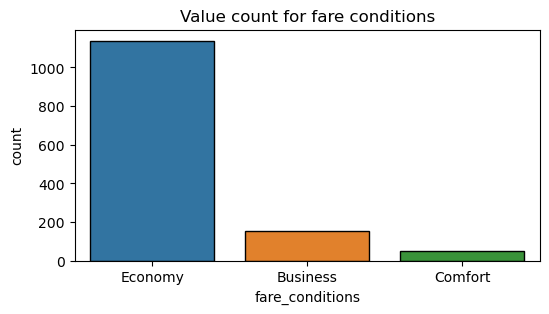

In [672]:
plt.figure(figsize = (6,3))
sns.countplot(data=seats, x = 'fare_conditions', order = seats['fare_conditions'].value_counts().index,
             edgecolor='black', linewidth=1)
plt.title('Value count for fare conditions');

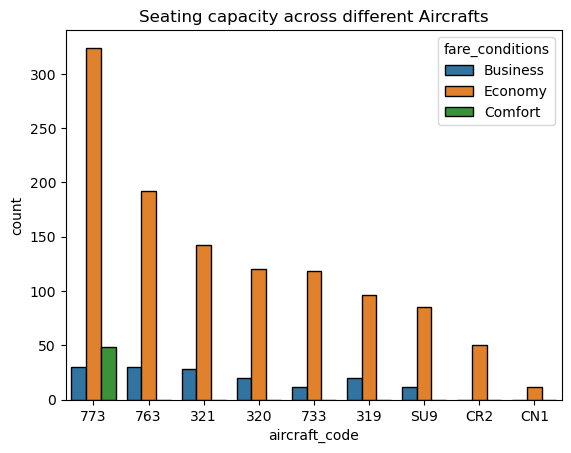

In [424]:
sns.countplot(data=seats, x = 'aircraft_code', hue = 'fare_conditions', order = seats['aircraft_code'].value_counts().index,
             edgecolor='black', linewidth=1)
plt.title('Seating capacity across different Aircrafts');

#### Checking Seating Capacity across different Aircraft codes

In [420]:
pd.crosstab(seats['aircraft_code'], seats['fare_conditions'], margins=True)

fare_conditions,Business,Comfort,Economy,All
aircraft_code,,,,
319,20,0,96,116
320,20,0,120,140
321,28,0,142,170
733,12,0,118,130
763,30,0,192,222
773,30,48,324,402
CN1,0,0,12,12
CR2,0,0,50,50
SU9,12,0,85,97


### Analysing Bookings

In [555]:
bookings = pd.read_sql_query('select * from bookings', connection)

#### Checking first and last five rows of the dataset

In [556]:
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


#### Checking shape of the dataset

In [557]:
rows = ['Number of rows', 'Number of columns']
pd.DataFrame(bookings.shape, columns = ['shape of the dataset'], index=rows)

,shape of the dataset
Number of rows,262788
Number of columns,3


#### Checking datatypes of Attributes in a dataset

In [558]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262788 entries, 0 to 262787
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   book_ref      262788 non-null  object
 1   book_date     262788 non-null  object
 2   total_amount  262788 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.0+ MB


In [559]:
bookings['book_date'] = pd.to_datetime(bookings['book_date'], dayfirst=True)

In [560]:
bookings.dtypes

book_ref                                       object
book_date       datetime64[ns, pytz.FixedOffset(180)]
total_amount                                    int64
dtype: object

#### Checking Descriptive statistics of the dataset

In [561]:
bookings.describe()

,total_amount
count,2.627880e+05
mean,7.902561e+04
std,7.762192e+04
min,3.400000e+03
25%,2.900000e+04
50%,5.590000e+04
75%,9.920000e+04
max,1.204500e+06


#### Checking for Missing values in a dataset

In [562]:
pd.DataFrame(bookings.isnull().sum(), columns = ['Null values'])

,Null values
book_ref,0
book_date,0
total_amount,0


#### Creating new column for month and date

In [563]:
bookings['month'] = bookings['book_date'].dt.month

In [564]:
bookings['date'] = bookings['book_date'].dt.date

In [565]:
bookings['date'] = pd.to_datetime(bookings['date'], dayfirst=True)

In [566]:
bookings.dtypes

book_ref                                       object
book_date       datetime64[ns, pytz.FixedOffset(180)]
total_amount                                    int64
month                                           int64
date                                   datetime64[ns]
dtype: object

In [567]:
bookings

,book_ref,book_date,total_amount,month,date
0,00000F,2017-07-05 03:12:00+03:00,265700,7,2017-07-05
1,000012,2017-07-14 09:02:00+03:00,37900,7,2017-07-14
2,000068,2017-08-15 14:27:00+03:00,18100,8,2017-08-15
3,000181,2017-08-10 13:28:00+03:00,131800,8,2017-08-10
4,0002D8,2017-08-07 21:40:00+03:00,23600,8,2017-08-07
...,...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03:00,56000,7,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03:00,10800,8,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03:00,78500,7,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03:00,28800,8,2017-08-08


#### Plotting graph and table showing total amount earned with respect to month

In [568]:
bookings.groupby(['month'])['total_amount'].sum()

month
6      557361000
7    13234251800
8     6975368100
Name: total_amount, dtype: int64

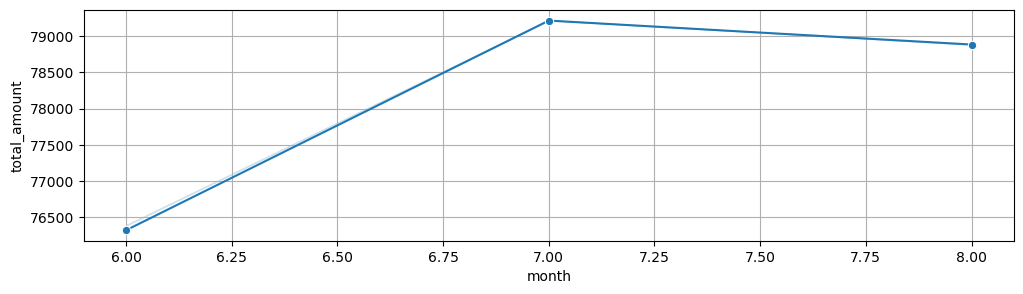

In [569]:
plt.figure(figsize = (12,3))
sns.lineplot(data=bookings, x = 'month', y = 'total_amount', ci=False, marker='o')
plt.grid();

- From above table we can say that total amount of ticket booking is higher for the month of July followed by August

#### Plotting graph and table showing Total amount earned with time

In [570]:
x = bookings.groupby(['date'])[['total_amount']].sum()
x

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


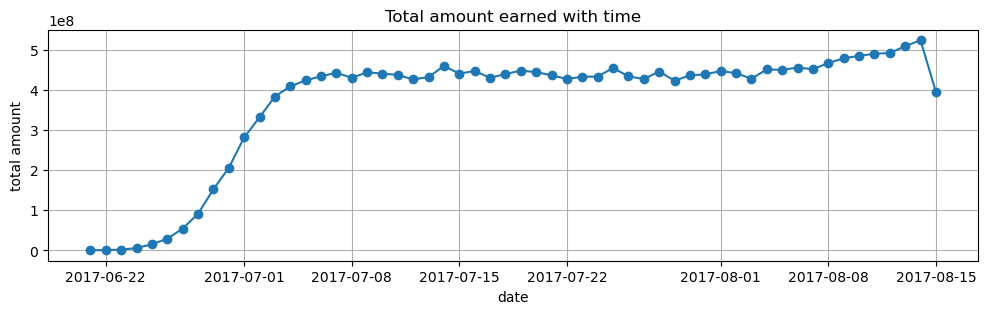

In [571]:
plt.figure(figsize = (12,3))
plt.plot(x.index, x['total_amount'], marker = 'o')
plt.grid()
plt.xlabel('date')
plt.ylabel('total amount')
plt.title('Total amount earned with time');

### Analysing Tickets

In [573]:
tickets = pd.read_sql_query('select * from tickets', connection)

In [574]:
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


#### Checking shape of the dataset

In [575]:
rows = ['Number of rows', 'Number of columns']
pd.DataFrame(tickets.shape, columns = ['shape of dataset'], index=rows)

,shape of dataset
Number of rows,366733
Number of columns,3


#### Checking datatype of Attributes in a dataset

In [576]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366733 entries, 0 to 366732
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ticket_no     366733 non-null  object
 1   book_ref      366733 non-null  object
 2   passenger_id  366733 non-null  object
dtypes: object(3)
memory usage: 8.4+ MB


#### Checking for Missing values in a dataset

In [577]:
pd.DataFrame(tickets.isnull().sum(), columns = ['null values'])

,null values
ticket_no,0
book_ref,0
passenger_id,0


### Note: Bookings table and Tickets table has common column 'book_ref' so we will going to use Inner join in order to combine both the tables

### To combine the two tables their are 2 methods
- Either we can use SQL query
- Or we can use Pandas function merge()

#### Method:1 Using SQL query

In [588]:
tickets2 = pd.read_sql_query('select * from tickets inner join bookings \
                             on tickets.book_ref = bookings.book_ref', connection)

In [589]:
tickets2

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03,210600
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03,210600
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03,45900
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03,219400


#### Method:2 Using Pandas function

In [580]:
t2 = pd.merge(tickets, bookings, how = 'inner', on = 'book_ref')

In [582]:
t2

,ticket_no,book_ref,passenger_id,book_date,total_amount,month,date
0,0005432000987,06B046,8149 604011,2017-07-05 20:19:00+03:00,12400,7,2017-07-05
1,0005432000988,06B046,8499 420203,2017-07-05 20:19:00+03:00,12400,7,2017-07-05
2,0005432000989,E170C3,1011 752484,2017-06-29 01:55:00+03:00,24700,6,2017-06-29
3,0005432000990,E170C3,4849 400049,2017-06-29 01:55:00+03:00,24700,6,2017-06-29
4,0005432000991,F313DD,6615 976589,2017-07-03 04:37:00+03:00,30900,7,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,2017-08-14 11:50:00+03:00,210600,8,2017-08-14
366729,0005435999870,D730BA,6535 751108,2017-08-14 11:50:00+03:00,210600,8,2017-08-14
366730,0005435999871,A1AD46,1596 156448,2017-08-13 03:49:00+03:00,45900,8,2017-08-13
366731,0005435999872,7B6A53,9374 822707,2017-08-15 15:54:00+03:00,219400,8,2017-08-15


#### Plotting graph to check Number of Tickets sold with time

In [585]:
x = t2.groupby(['date'])[['ticket_no']].count()
x

,ticket_no
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


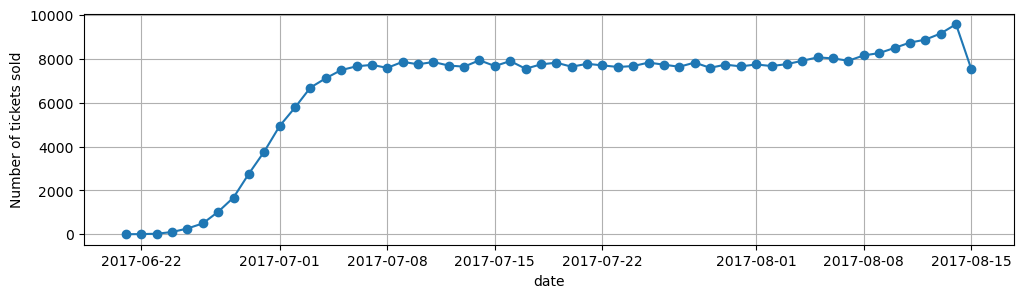

In [587]:
plt.figure(figsize = (12,3))
plt.plot(x.index, x['ticket_no'], marker = 'o')
plt.grid()
plt.xlabel('date')
plt.ylabel('Number of tickets sold');

### Analysing Ticket_Flights data

In [664]:
ticket_flights = pd.read_sql_query('select * from ticket_flights', connection)

#### Checking first and last five rows of the dataset

In [665]:
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


#### Checking shape of the dataset

In [666]:
rows = ['Number of rows', 'Number of columns']
pd.DataFrame(ticket_flights.shape, columns = ['shape of dataset'], index=rows)

,shape of dataset
Number of rows,1045726
Number of columns,4


#### Checking datatypes of Attributes in a dataset

In [667]:
ticket_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045726 entries, 0 to 1045725
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   ticket_no        1045726 non-null  object
 1   flight_id        1045726 non-null  int64 
 2   fare_conditions  1045726 non-null  object
 3   amount           1045726 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 31.9+ MB


#### Checking for Missing values in a dataset

In [668]:
pd.DataFrame(ticket_flights.isnull().sum(), columns = ['Null values'])

,Null values
ticket_no,0
flight_id,0
fare_conditions,0
amount,0


#### Checking Ticket Amount for different classes/fare_conditions

In [669]:
ticket_flights.groupby(['fare_conditions'])[['amount']].mean()

,amount
fare_conditions,
Business,51143.416139
Comfort,32740.552889
Economy,15959.813335


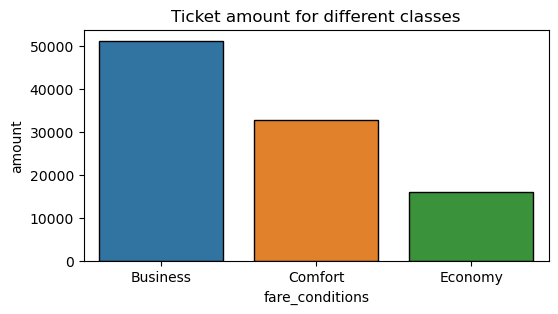

In [670]:
plt.figure(figsize = (6,3))
sns.barplot(data=ticket_flights, x = 'fare_conditions', y = 'amount', ci=False, edgecolor='black', linewidth=1)
plt.title('Ticket amount for different classes');

- From above table we can say that on an Average ticket price is Higher for Business class and lowest price is for Economy class

### NOTE: Now we will going to join flights table and ticket_flights table having common column flight_id

- Using SQL query
- Or we can use Pandas function

#### Checking Fare distribution for different Aircrafts

In [715]:
fare = pd.read_sql_query('select f.aircraft_code, tf.fare_conditions, avg(tf.amount) as average_amount \
                         from ticket_flights tf inner join flights f \
                       on tf.flight_id = f.flight_id \
                       group by f.aircraft_code, tf.fare_conditions', connection)

In [716]:
fare

,aircraft_code,fare_conditions,average_amount
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


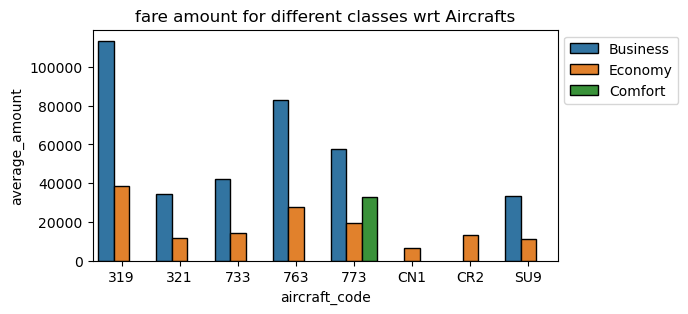

In [662]:
plt.figure(figsize = (6,3))
sns.barplot(data=fare, x = 'aircraft_code', y = 'average_amount', hue = 'fare_conditions', ci=False, 
           edgecolor='black', linewidth=1)
plt.title('fare amount for different classes wrt Aircrafts')
plt.legend(bbox_to_anchor=[1,1]);

- From above table and graph we can say that on an Average fare amount for Airbus-319 Business class is Higher as compared to other Fleets

#### Checking Total Revenue generated and Average Revenue generated per ticket for different Aircrafts

In [713]:
revenue = pd.read_sql_query('select f.aircraft_code, count(*) as ticket_count, sum(tf.amount) as total_revenue, \
                            sum(tf.amount)/count(*) as revenue_per_ticket \
                            from ticket_flights tf inner join flights f \
                            on tf.flight_id = f.flight_id \
                            group by f.aircraft_code', connection)

In [714]:
revenue

,aircraft_code,ticket_count,total_revenue,revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


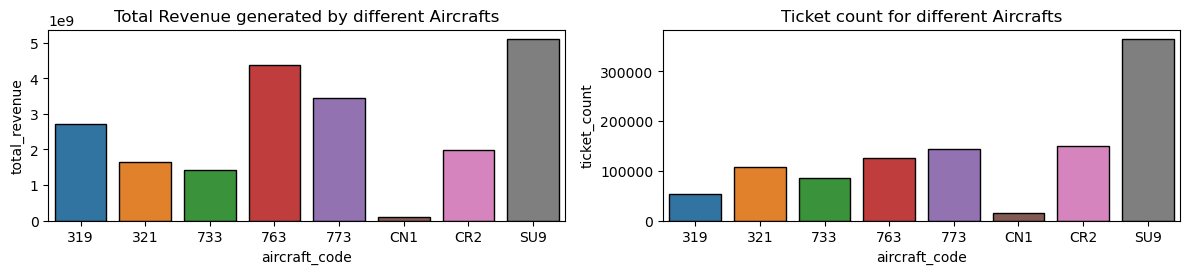

In [675]:
plt.figure(figsize = (12,3))
plt.subplot(1,2,1)
sns.barplot(data=revenue, x = 'aircraft_code', y = 'total_revenue', ci=False, edgecolor='black', linewidth=1)
plt.title('Total Revenue generated by different Aircrafts')
plt.subplot(1,2,2)
sns.barplot(data=revenue, x = 'aircraft_code', y = 'ticket_count', ci=False, edgecolor='black', linewidth=1)
plt.title('Ticket count for different Aircrafts')
plt.tight_layout();

### Analysing Boarding_passes data

In [633]:
boarding_passes = pd.read_sql_query('select * from boarding_passes', connection)

#### Checking first and last five rows of the dataset

In [634]:
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


#### Checking shape of the dataset

In [678]:
rows = ['Number of rows', 'Number of columns']
pd.DataFrame(boarding_passes.shape, columns = ['shape of dataset'], index=rows)

,shape of dataset
Number of rows,579686
Number of columns,4


#### Checking datatype of Attributes in a dataset

In [679]:
boarding_passes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579686 entries, 0 to 579685
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ticket_no    579686 non-null  object
 1   flight_id    579686 non-null  int64 
 2   boarding_no  579686 non-null  int64 
 3   seat_no      579686 non-null  object
dtypes: int64(2), object(2)
memory usage: 17.7+ MB


#### Checking Missing values in a dataset

In [680]:
pd.DataFrame(boarding_passes.isnull().sum(), columns = ['Null values'])

,Null values
ticket_no,0
flight_id,0
boarding_no,0
seat_no,0


#### Checking Occuptancy Rate for different Aircrafts

In [747]:
booked_seats = pd.read_sql_query('select f.aircraft_code, bp.flight_id, count(*) as booked_seats \
                              from boarding_passes bp inner join flights f \
                              on bp.flight_id = f.flight_id \
                              group by f.aircraft_code, bp.flight_id', connection)

In [748]:
booked_seats

,aircraft_code,flight_id,booked_seats
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [755]:
total_seats = pd.read_sql_query('select aircraft_code, count(*) as number_of_seats from seats \
                                group by aircraft_code', connection)

In [756]:
total_seats

,aircraft_code,number_of_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [772]:
occupancy_rate = pd.read_sql_query('select a.aircraft_code, avg(a.seats_count) as booked_seats, b.num_seats,\
                                   avg(a.seats_count)/b.num_seats as occupancy_rate from \
                                   (select f.aircraft_code, f.flight_id, count(*) as seats_count \
                                  from boarding_passes bp inner join flights f \
                                  on bp.flight_id = f.flight_id \
                                  group by f.aircraft_code, f.flight_id) as a \
                                   inner join (select s.aircraft_code, count(*) as num_seats from seats s \
                                   group by s.aircraft_code) as b \
                                   on a.aircraft_code = b.aircraft_code \
                                   group by a.aircraft_code', connection)

In [773]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


#### Now we will going to calculate how much the total annual turnover would increase by giving all aircraft a 10% higher occupancy rate

In [774]:
occupancy_rate['Increase_occupancy_rate_by_10%'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1

In [775]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Increase_occupancy_rate_by_10%
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261
